In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = ['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울글로벌센터 월별 접수유형별 분류별 상담실적\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울글로벌센터 월별 접수유형별 분류별 상담실적\\서울글로벌센터 월별 접수유형별 분류별 상담실적.csv']

In [23]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,년월,대분류,중분류,전화,방문,이메일,게시판,화상상담,이동상담,합계
0,202211,교육,교육기관,12,1,0,0,0,0,13
1,202211,교육,기타,3,2,0,0,0,0,5
2,202211,교육,보육시설,1,0,0,0,0,0,1
3,202211,교육,불편/개선건의,0,0,0,0,0,0,0
4,202211,교육,일반교육,8,1,0,0,0,0,9


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월      5169 non-null   int64 
 1   대분류     5169 non-null   object
 2   중분류     5169 non-null   object
 3   전화      5169 non-null   int64 
 4   방문      5169 non-null   int64 
 5   이메일     5169 non-null   int64 
 6   게시판     5169 non-null   int64 
 7   화상상담    5169 non-null   int64 
 8   이동상담    5169 non-null   int64 
 9   합계      5169 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 404.0+ KB


In [25]:
df.describe()

,년월,전화,방문,이메일,게시판,화상상담,이동상담,합계
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.0,5169.000000,5169.000000
mean,202075.949894,16.281873,2.813310,0.773651,0.258851,0.0,0.138325,20.630103
std,101.232649,46.641601,13.328074,11.070831,2.178546,0.0,4.078802,60.660839
min,201907.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,202005.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,202103.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000
75%,202201.000000,16.000000,2.000000,0.000000,0.000000,0.0,0.000000,20.000000
max,202211.000000,1646.000000,458.000000,565.000000,73.000000,0.0,175.000000,2208.000000


In [26]:
df.describe(include=np.object)

,대분류,중분류
count,5169,5169
unique,14,101
top,비즈니스,기타
freq,738,574


In [27]:
df.isnull().sum()

년월      0
대분류     0
중분류     0
전화      0
방문      0
이메일     0
게시판     0
화상상담    0
이동상담    0
합계      0
dtype: int64

In [28]:
for c in df:
    print(f'{c}({df[c].dtype}) : {df[c].unique()}')

년월(int64) : [202211 202210 202209 202208 202207 202206 202205 202204 202203 202202
 202201 202112 202111 202110 202109 202108 202107 202106 202105 202104
 202103 202102 202101 202012 202011 202010 202009 202008 202007 202006
 202005 202004 202003 202002 202001 201912 201911 201910 201909 201908
 201907]
대분류(object) : ['교육' '교통' '금융' '기타' '노무' '문화/관광' '보건/복지' '비즈니스' '안전' '여성/가족' '정보통신' '주거'
 '출입국' '행정']
중분류(object) : ['교육기관' '기타' '보육시설' '불편/개선건의' '일반교육' '한국어교육' '대중교통' '유실물' '항공 및 선박' '신용카드'
 '은행업무' '렌탈' '매매/교환' '센터안내' '통역' '고용보험' '구인' '구직' '근로자교육' '근로조건' '급여'
 '부당해고' '사업장변경' '사업장이탈' '산재보험' '외국근로자보험' '재고용' '체불임금' '교류/행사' '여행/관광'
 '자원봉사' '종교' '건강보험' '국민연금' '동물병원' '무료진료' '방역' '사보험' '사회복지' '심리상담' '의료기관'
 '재난지원금' '중국어 심리상담' 'FDI/금융' '관세/통관' '노무/인사' '마케팅' '무역특화' '법률/상법' '비자'
 '비즈네트워킹' '비즈한국어' '세금' '인허가' '지식재산권' '창업교육' '창업보육' '창업일반' '회사설립' '교통사고'
 '민사사건' '일반사고' '재난/재해' '형사사건' '가정폭력' '가족상담' '이혼' '임신/출산' '우편/택배등' '인터넷'
 '전화' '케이블/위성TV' '휴대폰' '공과금' '부동산매매' '부동산임대' '이사' '주거관련분쟁' '검역/세관'
 '귀화/영주권' 

In [29]:
df['년도'] = df['년월'].apply(lambda x:x//100)
df['월'] = df['년월'].apply(lambda x:x%100)

**연도/월별 접수 유형은?**

**시간에 따른 전체 접수 유형의 변화는?**

**대분류별 접수 유형은?**

**대분류별 각 중분류의 비율은?**

**접수 유형 별 비율 높은 중분류 top5?**

## 시각화

In [30]:
df.columns

Index(['년월', '대분류', '중분류', '전화', '방문', '이메일', '게시판', '화상상담', '이동상담', '합계',
       '년도', '월'],
      dtype='object')

In [151]:
type_list = ['합계','전화', '방문', '이메일', '게시판', '화상상담', '이동상담']
def convert_shape_year(df,y):
    new_df = pd.DataFrame([y for _ in range(7)],columns=['년도'])
    new_df['접수 유형'] = np.array(type_list)
    new_df['건수'] = df[df['년도']==y].values.squeeze()[1:]
    return new_df

def convert_shape_month(df,m):
    new_df = pd.DataFrame([m for _ in range(7)],columns=['월'])
    new_df['접수 유형'] = np.array(type_list)
    new_df['건수'] = df[df['월']==m].values.squeeze()[1:]
    return new_df

def convert_shape_category(df,c):
    new_df = pd.DataFrame([c for _ in range(7)],columns=['대분류'])
    new_df['접수 유형'] = np.array(type_list)
    new_df['건수'] = df[df['대분류']==c].values.squeeze()[1:]
    return new_df

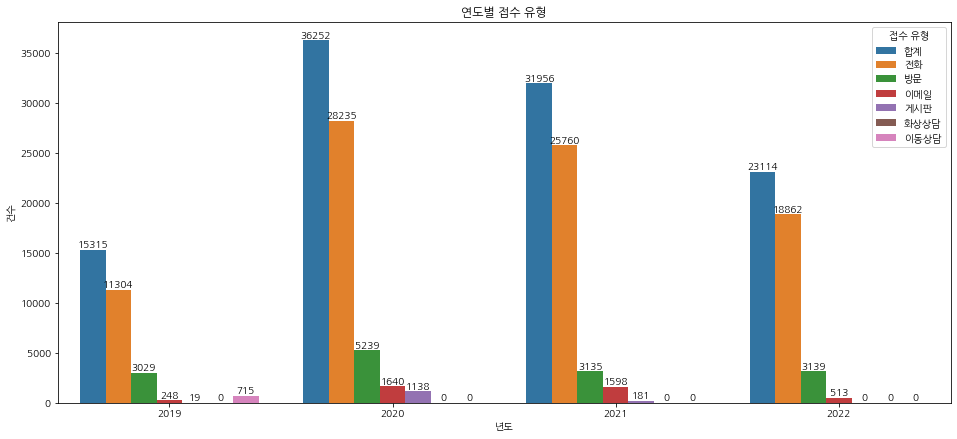

In [152]:
sub_df = df[['년도']+type_list].groupby(by=['년도'],as_index=False)[type_list].sum()
convert_df = pd.DataFrame()
for y in df['년도'].unique():
    convert_df = pd.concat([convert_df,convert_shape_year(sub_df,y)])
convert_df.reset_index(drop=True,inplace=True)

plt.figure(figsize=(16,7))
ax=sns.barplot(data=convert_df,x='년도',y='건수',hue='접수 유형')
plt.title(f'연도별 접수 유형')
for container in ax.containers:
    ax.bar_label(container)

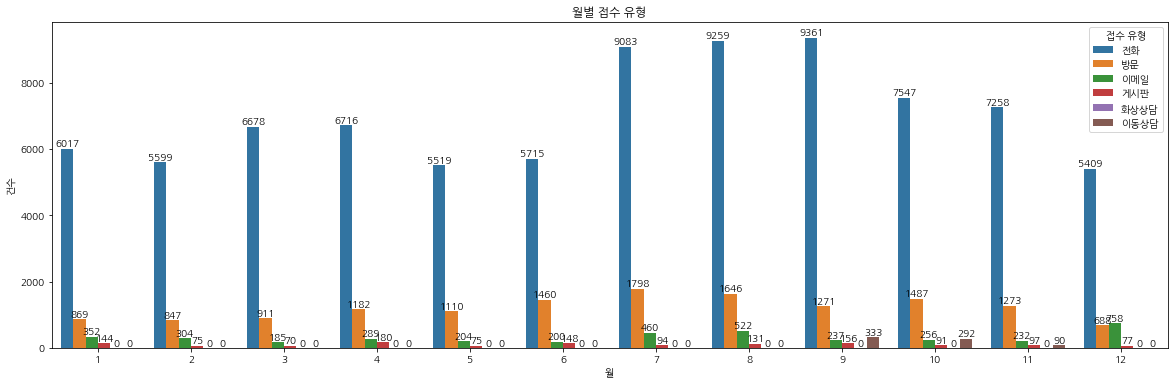

In [97]:
sub_df = df[['월']+type_list].groupby(by=['월'],as_index=False)[type_list].sum()
convert_df = pd.DataFrame()
for m in df['월'].unique():
    convert_df = pd.concat([convert_df,convert_shape_month(sub_df,m)])
convert_df.reset_index(drop=True,inplace=True)

plt.figure(figsize=(20,6))
ax=sns.barplot(data=convert_df,x='월',y='건수',hue='접수 유형')
plt.title(f'월별 접수 유형')
for container in ax.containers:
    ax.bar_label(container)

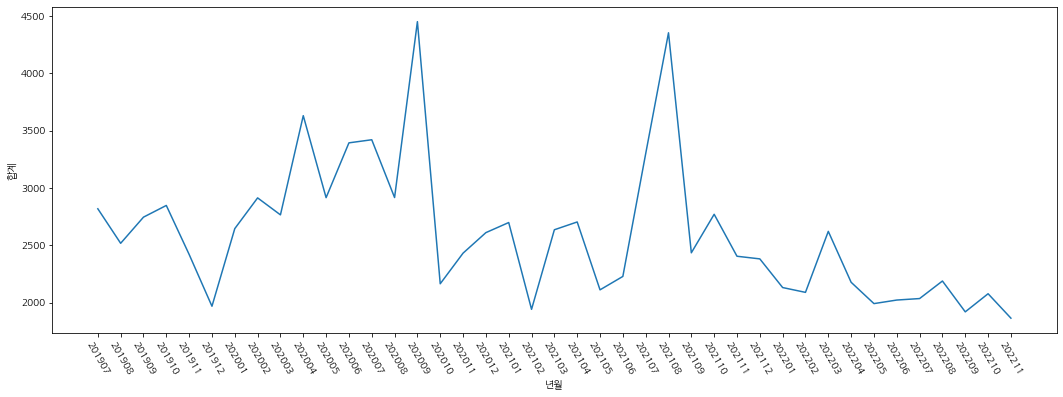

In [108]:
sub_df = df.groupby(by=['년월'],as_index=False)['합계'].sum()
sub_df=sub_df.astype({'년월':'str'})
plt.figure(figsize=(18,6))
sns.lineplot(data=sub_df,x='년월',y='합계')
g=plt.xticks(rotation=-60)

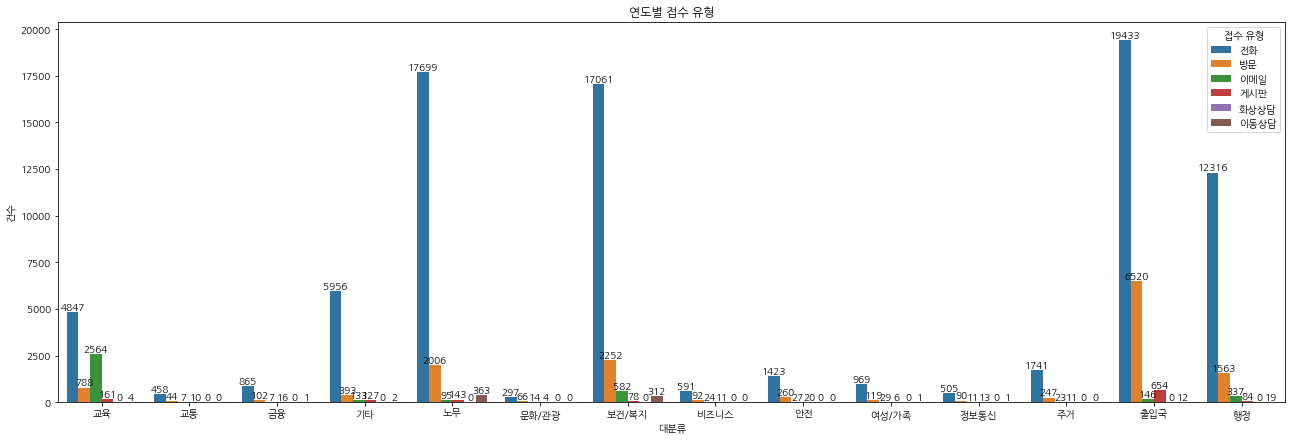

In [115]:
sub_df = df[['대분류']+type_list].groupby(by=['대분류'],as_index=False)[type_list].sum()
convert_df = pd.DataFrame()
for c in df['대분류'].unique():
    convert_df = pd.concat([convert_df,convert_shape_category(sub_df,c)])
convert_df.reset_index(drop=True,inplace=True)

plt.figure(figsize=(22,7))
ax=sns.barplot(data=convert_df,x='대분류',y='건수',hue='접수 유형')
plt.title(f'연도별 접수 유형')
for container in ax.containers:
    ax.bar_label(container)

In [144]:
sub_df = sub_df.sort_values(by='합계',ascending=False)

,대분류,중분류,합계
65,비즈니스,비즈한국어,0
55,비즈니스,FDI/금융,1
38,문화/관광,불편/개선건의,2
64,비즈니스,비즈네트워킹,2
62,비즈니스,불편/개선건의,3
...,...,...,...
26,노무,급여,4460
111,출입국,출국/입국,4987
5,교육,한국어교육,6548
47,보건/복지,방역,7228


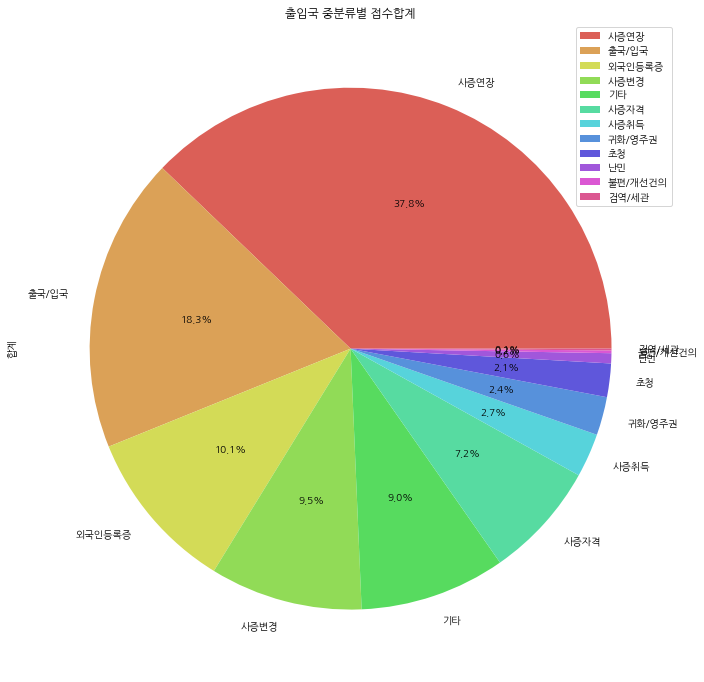

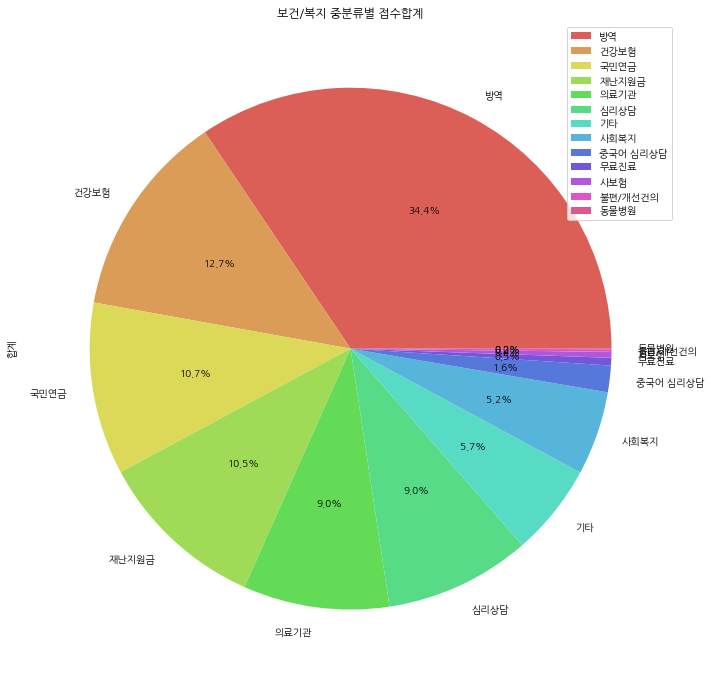

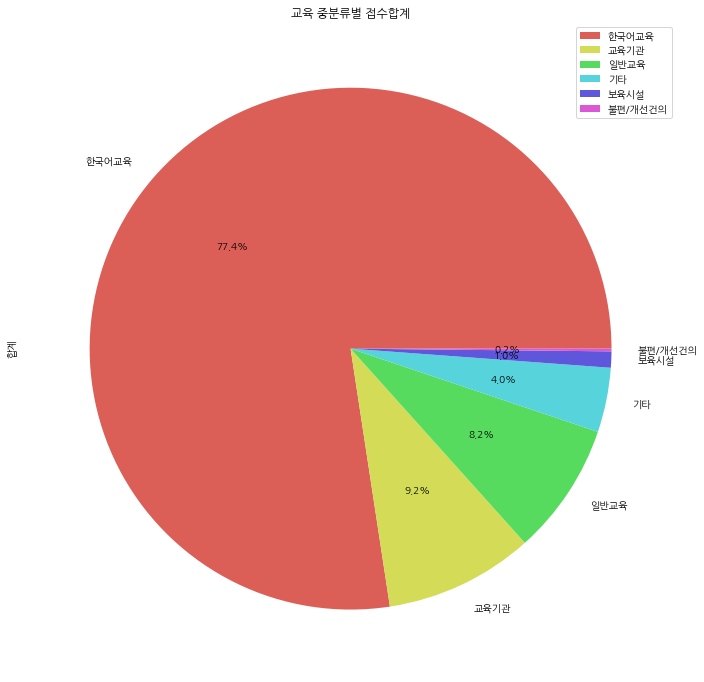

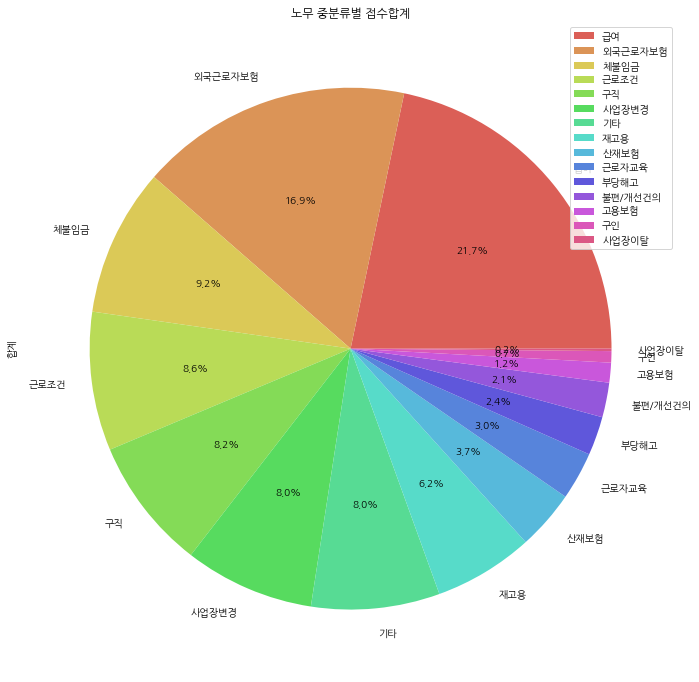

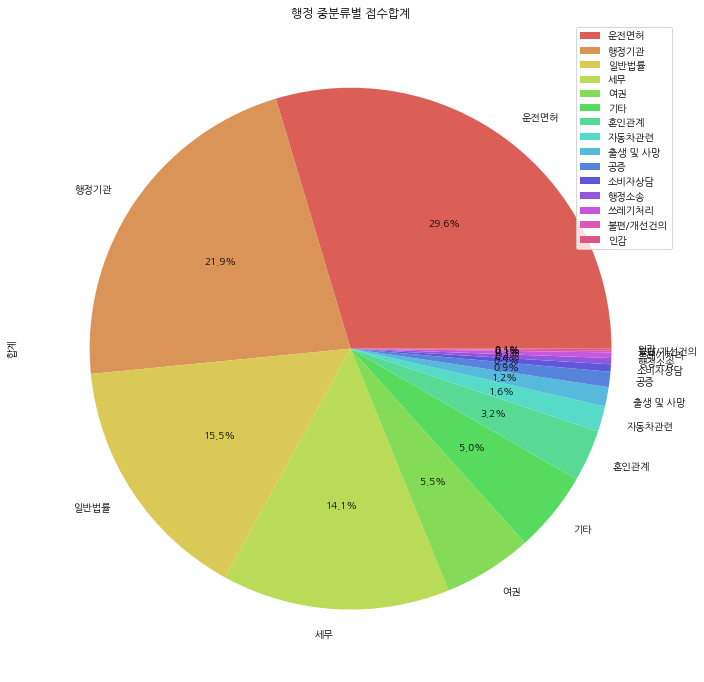

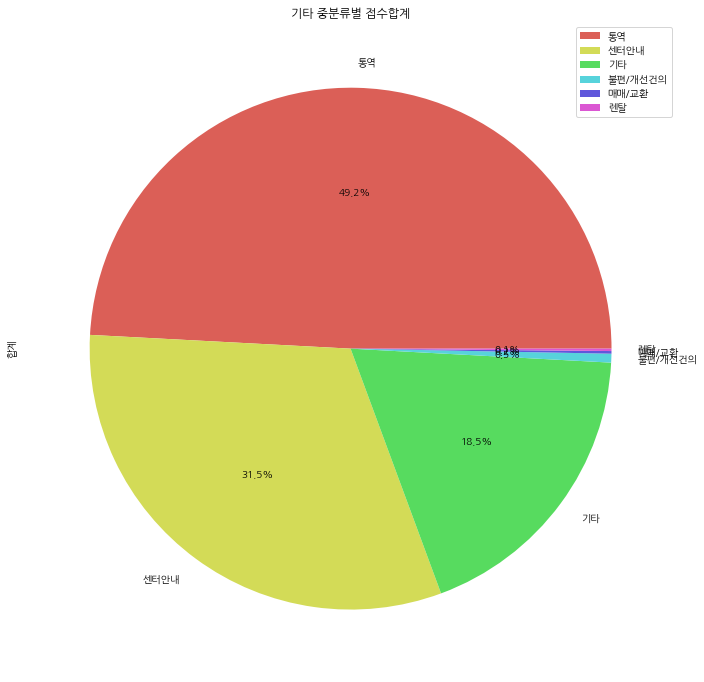

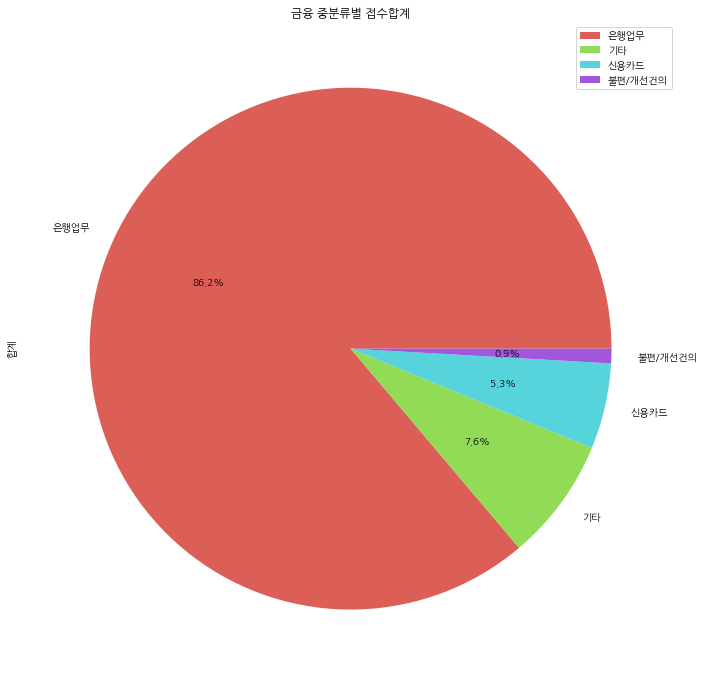

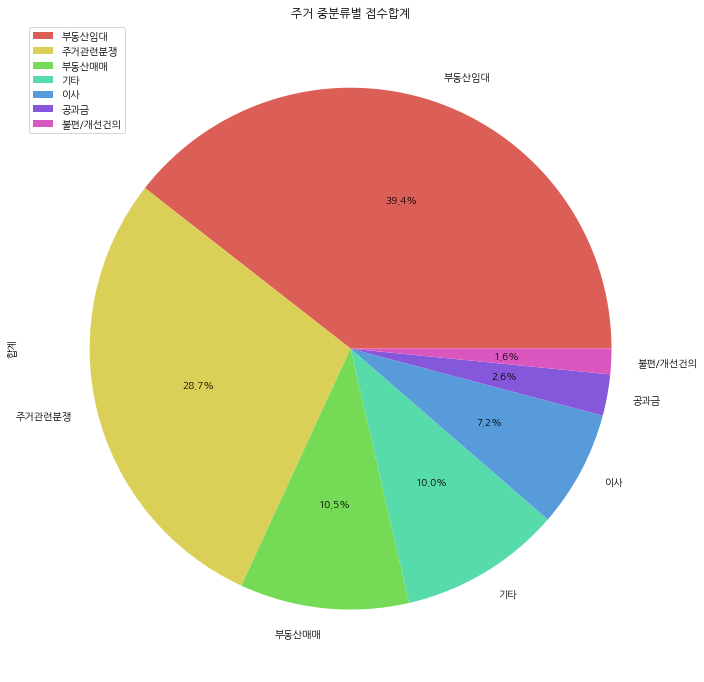

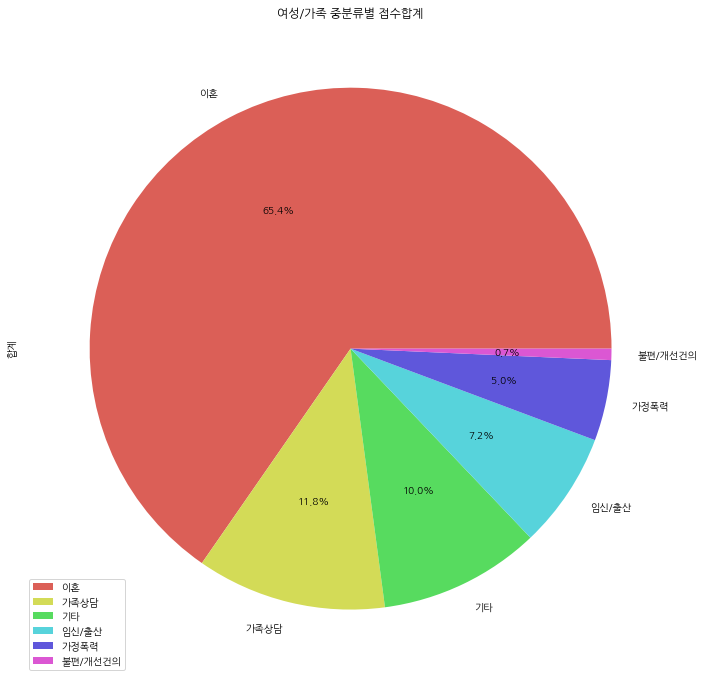

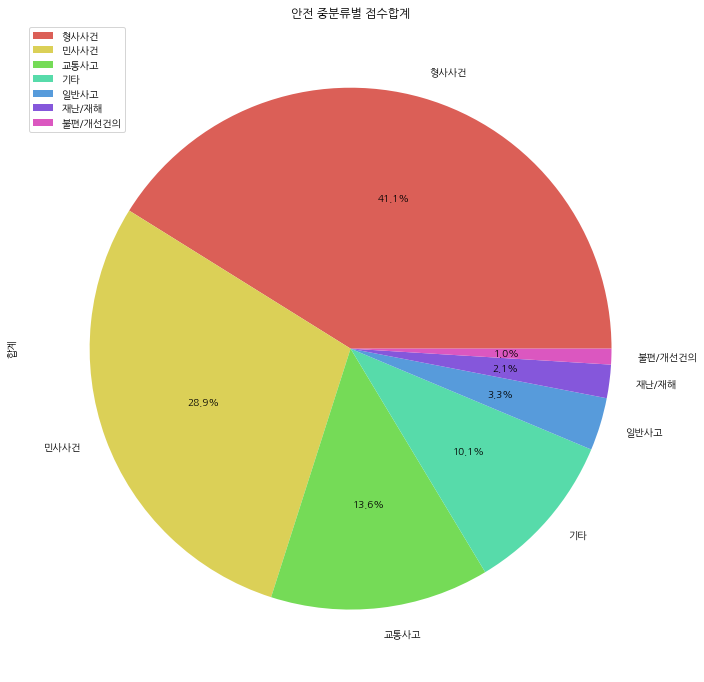

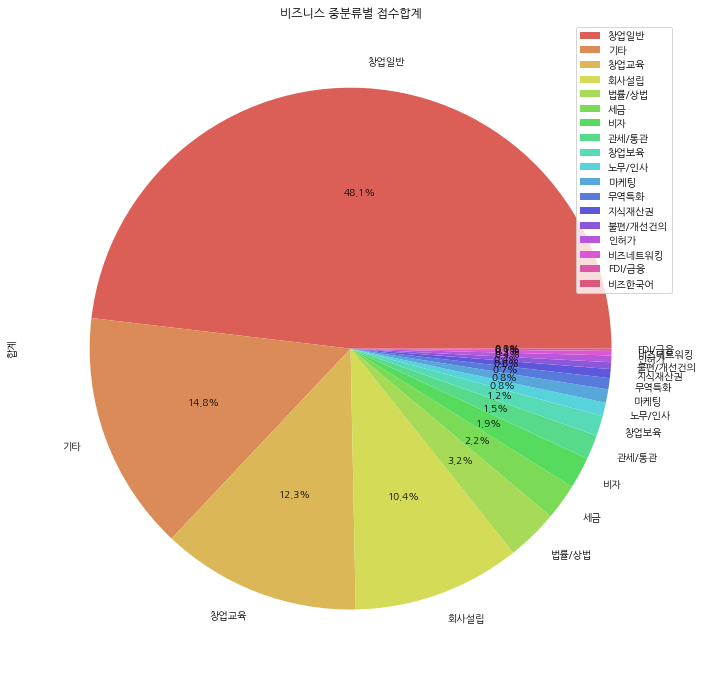

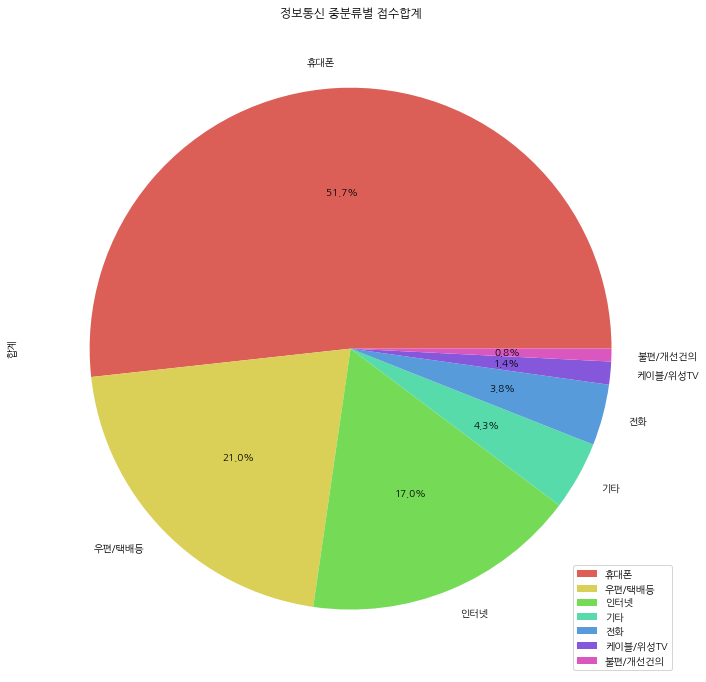

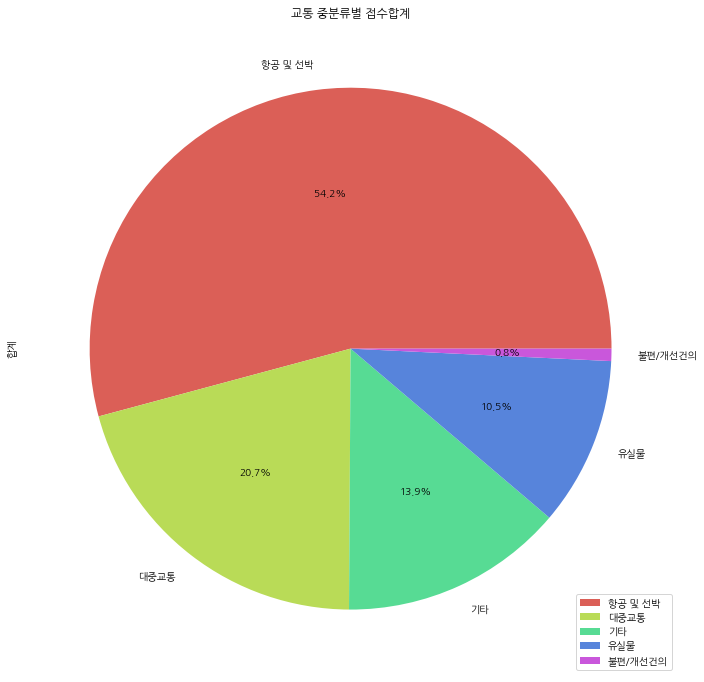

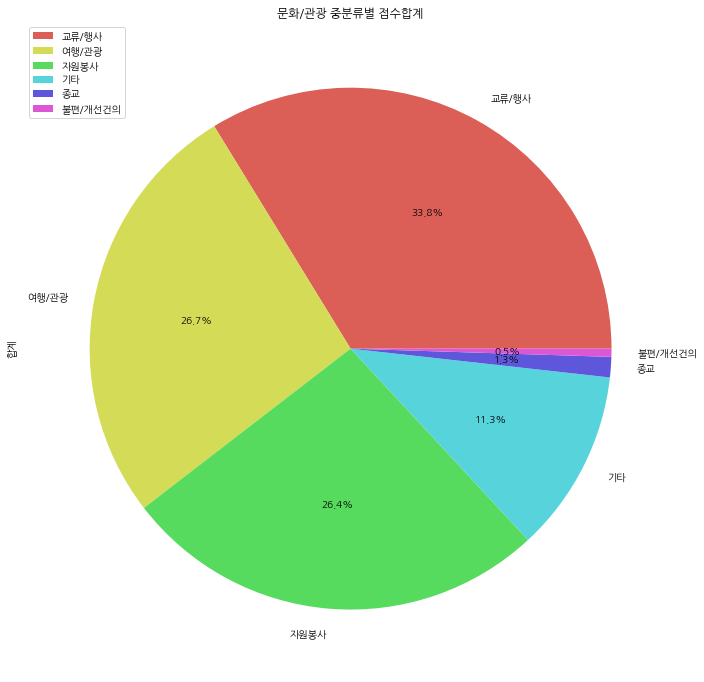

In [146]:
sub_df = df.groupby(by=['대분류','중분류'],as_index=False)['합계'].sum()
sub_df = sub_df.sort_values(by='합계',ascending=False)

for c in sub_df['대분류'].unique():
    labels = sub_df[sub_df['대분류']==c]['중분류'].unique()
    colors = sns.color_palette('hls',len(labels))
    sub_df[sub_df['대분류']==c].plot.pie(y='합계',labels=labels,colors=colors,figsize=(12,12),autopct='%.1f%%').set(title=f'{c} 중분류별 접수합계')

**연도/월별 접수 유형은?**

- 2020,2021,2022,2019 순으로 크다.

- 전화,방문 순으로 유형이 크게 나타나고 나머지는 년도별로 비율이 상이하다.

- 7월-9월에 높게 나타나고 이후 겨울까지는 감소하는 추세다.

**시간에 따른 전체 접수 유형의 변화는?**

- 2020년 1월부터 9월까지 급격히 상승하는 추세다.

- 2021년 8월에 급증했다가 쭉 감소하는 추세다.

**대분류별 접수 유형은?**

- 대부분 전화가 가장 높고 방문이 그 다음으로 높다.

- 교육은 예외로 전화 다음으로 이메일이 높다.

**대분류별 각 중분류의 비율은?**

- 출입국은 사증연장,출입국,외국인등록증 순으로 높다.

- 보건/복지는 방역,건강보험,국민연금,재난 지원금 순으로 높다.

- 교육의 77%는 한국어교육에 관한 상담이다.

- 노무는 급여,외국근로자보험,체불임금,근로조건,구직 순으로 높다.

- 행정은 운전면허,행정기관,일반법률,세무 순으로 높다.

- 기타의 약 49%는 통역, 31%는 센터안내에 관한 상담이다.

- 금융의 86%는 은행업무에 관한 상담이다.

- 주거는 부동산임대,주거관련분쟁,부동산매매 순으로 높다.

- 여성/가족은 65%가 이혼이고 가족상담,기타,임신/출산,가정폭력 순으로 높다.

- 안전은 형사사건,민사사건,교통사고 순으로 높다.

- 비즈니스는 창업일반, 기타, 창업교육,회사설립 순으로 높다.

- 정보통신은 휴대폰,우편/택배동,인터넷 순으로 높다.

- 교통은 항공 및 선박, 대중교통, 기타, 유실물 순으로 높다.

- 문화/관광은 교류/행사,여행/관광,자원봉사 순으로 높다.